In [1]:
# Importations de packages
import numpy as np
import geopandas as gpd
import folium
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from shapely import Point
import seaborn as sns 

pd.options.display.max_columns = 999

In [2]:
from src.config import *
from src.utils import make_path, check_dir
from src.traitements import AppariementRunner
from src.traitements import get_communes_from_radius

In [3]:
roi_name = "lyon"

In [39]:
out_dir = check_dir(project_path, "reports", roi_name)
wh_app_path = make_path("Appariement", processed_data_path, roi_name, "{}") #roi_name, year, buffer_size

In [35]:
for f in os.listdir(out_dir): 
    print(make_path(f, out_dir))

/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/reports/lyon/statistics_lyon_2008_2023.csv
/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/reports/lyon/statistics_lyon_2008_2013.csv
/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/reports/lyon/statistics_lyon_2013_2023.csv
/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/reports/lyon/.~lock.statistics_lyon_2008_2013.csv#


In [36]:
path = "/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/reports/lyon/statistics_lyon_2008_2023.csv"

In [19]:
df = pd.read_csv(path)

In [22]:
df.columns

Index(['radius', 'metro', 'mega_region', 'country', 'continent',
       'data_sources', 'time_period_start', 'time_period_end', 'years_data',
       'surfaces_area_available', 'urban_centrality', 'gateway', 'area',
       'number_mun', 'population_t0', 'density_pop_km2_t0', 'number_ware_t0',
       'number_ware_per_popM_t0', 'number_ware_per_1000km2_t0',
       'avg_size_ware_t0', 'gravity_t0', 'population_t1', 'density_pop_km2_t1',
       'number_ware_t1', 'number_ware_per_popM_t1',
       'number_ware_per_1000km2_t1', 'avg_size_ware_t1', 'gravity_t1',
       'pop_change', 'gravity_change', 'number_ware_change',
       'perc_ware_change', 'number_ware_per_popM_change',
       'log_sprawl_measure'],
      dtype='object')

### Evolution of wh Dist to centroid

In [211]:
# df_dist = pd.concat([wh_t0["dist_centroid"].rename(f"{year_t0}"), wh_t1["dist_centroid"].rename(f"{year_t1}")], axis=1)

In [214]:
# df_mdist = df_dist.melt(var_name="year", value_name="dist")

In [109]:
year_t0 = "2008"
year_t1 = "2013"
year_t2 = "2023"

s_buffer = 25

_fname = "Entrepots_{}_{}_{}km_app.gpkg" #roi_name, year, buffer_size
wh_app_path_t0 = make_path(_fname.format(roi_name.upper(), year_t0, s_buffer), wh_app_path.format(year_t0))
wh_app_path_t1 = make_path(_fname.format(roi_name.upper(), year_t1, s_buffer), wh_app_path.format(year_t1))
wh_app_path_t2 = make_path(_fname.format(roi_name.upper(), year_t2, s_buffer), wh_app_path.format(year_t2))

wh_t0 = gpd.read_file(wh_app_path_t0)
wh_t1 = gpd.read_file(wh_app_path_t1)
wh_t2 = gpd.read_file(wh_app_path_t2)


#wh_centroid = np.mean(wh_df.centroid.x), np.mean(wh_df.centroid.y)

def get_dist_centroid(wh_df): 
    wh_centroid = np.mean(wh_df.centroid.x), np.mean(wh_df.centroid.y)
    return wh_df.distance(Point(wh_centroid)) / 1000

wh_t0["dist_centroid"] = get_dist_centroid(wh_t0)
wh_t1["dist_centroid"] = get_dist_centroid(wh_t1)
wh_t2["dist_centroid"] = get_dist_centroid(wh_t2)

/tmp/ipykernel_45770/3717818107.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wh_t0[col], ax=axes[0], label=year_t0, hist=False)
/tmp/ipykernel_45770/3717818107.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wh_t1[col], ax=axes[0], label=year_t1,  hist=False)
/tmp/

2008 : 6.753907996874046
2013 : 7.892539531912643
2023 : 10.544946026789257


Text(0.5, 0.98, 'Evolution des distances des entrepôts au barycentre logistique')

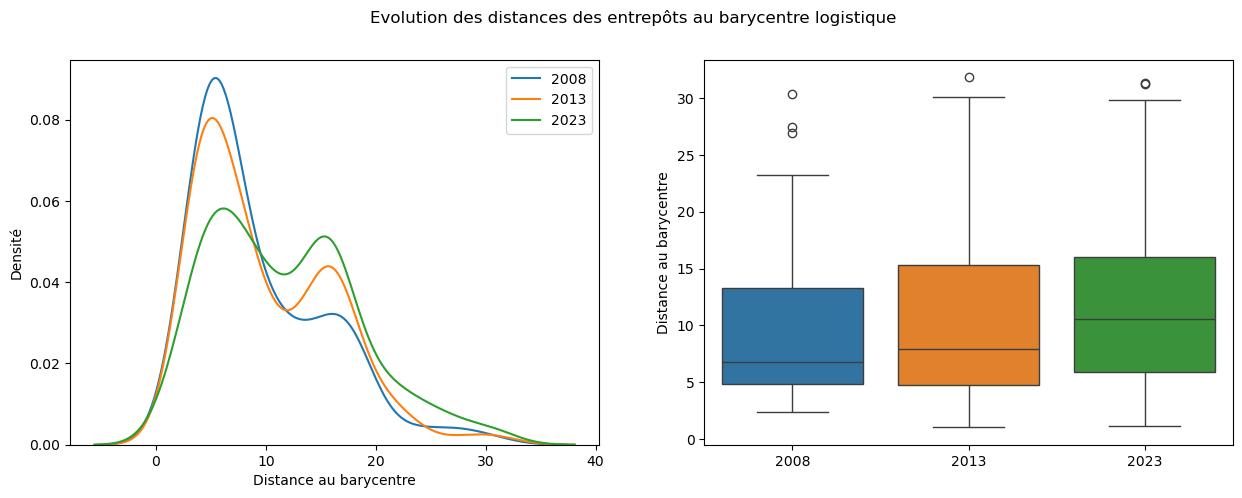

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

col = "dist_centroid"
median_t0 = np.median(wh_t0[col])
median_t1 = np.median(wh_t1[col])
median_t2 = np.median(wh_t2[col])

print(f"{year_t0} : {median_t0}")
print(f"{year_t1} : {median_t1}")
print(f"{year_t2} : {median_t2}")


sns.distplot(wh_t0[col], ax=axes[0], label=year_t0, hist=False)
sns.distplot(wh_t1[col], ax=axes[0], label=year_t1,  hist=False)
sns.distplot(wh_t2[col], ax=axes[0], label=year_t2,  hist=False)

axes[0].set_xlabel("Distance au barycentre")
axes[0].set_ylabel("Densité")
axes[0].legend()
# axes[0].axvline(median_t0, ls='--', label="median", color="tab:blue")
# axes[0].axvline(median_t1, ls='--', color="tab:orange")
# m, M, r = np.min(ax_hist.get_xticks()), np.min(ax_hist.get_xticks()), np.abs(ax_hist.get_xticks()[0] - ax_hist.get_xticks()[1])
# n_xticks = np.arange(m, M, r)
# n_xticks
df_dist = pd.concat(
    [
        wh_t0["dist_centroid"].rename(f"{year_t0}"), 
        wh_t1["dist_centroid"].rename(f"{year_t1}"), 
        wh_t2["dist_centroid"].rename(f"{year_t2}")
    ], axis=1)


sns.boxplot(df_dist, ax=axes[1])
axes[1].set_ylabel("Distance au barycentre")

fig.suptitle('Evolution des distances des entrepôts au barycentre logistique', fontsize=12)


# axes[1].axhline(median_t0, ls='--')
# axes[1].axhline(median_t1, ls='--')


# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc='center right', prop={'size':12})

In [178]:
def make_concat_ds_year(columns=None): 
    
    columns = columns if columns is not None else list(wh_t0.columns)

    df = pd.concat(
    [
        wh_t0[columns].rename({_:f"{_}_t0" for _ in columns}, axis=1), 
        wh_t1[columns].rename({_:f"{_}_t1" for _ in columns}, axis=1), 
        wh_t2[columns].rename({_:f"{_}_t2" for _ in columns}, axis=1)
    ], axis=1)

    return df

In [177]:
df_hist = make_concat_ds_year()

/tmp/ipykernel_45770/673519527.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([year_t0, year_t1, year_t2])


Text(0.5, 1.0, "Evolution du nombre d'entrepôts 2008-2023")

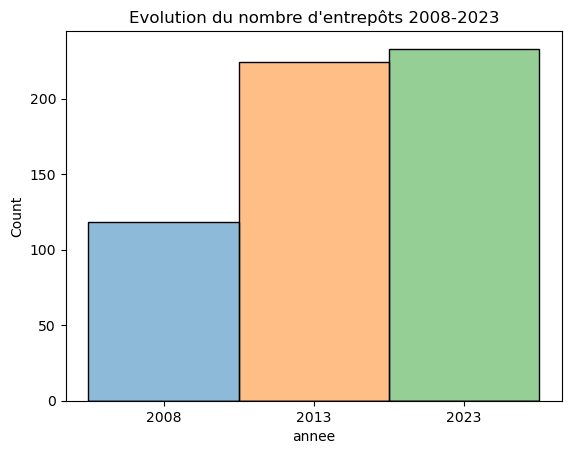

In [210]:
cnt = df_hist[["ID_t0","ID_t1", "ID_t2"]].melt(var_name="annee").dropna()
sns.histplot(x=cnt.annee, hue=cnt.annee, legend=False)
#plt.xticks_(plt.xticks(), labels=[year_t0, year_t1, year_t2])
ax = plt.gca()
ax.set_xticklabels([year_t0, year_t1, year_t2])
plt.title("Evolution du nombre d'entrepôts 2008-2023")

### Stats ZE

In [241]:
nums_cols = ['area',
       'number_mun', 'population_t0', 'density_pop_km2_t0', 'number_ware_t0',
       'number_ware_per_popM_t0', 'number_ware_per_1000km2_t0',
       'avg_size_ware_t0', 'gravity_t0', 'population_t1', 'density_pop_km2_t1',
       'number_ware_t1', 'number_ware_per_popM_t1',
       'number_ware_per_1000km2_t1', 'avg_size_ware_t1', 'gravity_t1',
       'pop_change', 'gravity_change', 'number_ware_change',
       'perc_ware_change', 'number_ware_per_popM_change', 'log_sprawl_measure'] 

def load_measure(roi_name, period=(2008, 2023)): 
    period_str = '_'.join(list(map(str, period)))
    out_dir = check_dir(project_path, "reports", roi_name)
    fpath = [make_path(f, out_dir) for f in os.listdir(out_dir) if period_str in f][0] 
    gdf = gpd.read_file(fpath)
    for c in nums_cols: 
        gdf[c] = gdf[c].astype(float)

    return gdf


In [240]:
df.columns

Index(['radius', 'metro', 'mega_region', 'country', 'continent',
       'data_sources', 'time_period_start', 'time_period_end', 'years_data',
       'surfaces_area_available', 'urban_centrality', 'gateway', 'area',
       'number_mun', 'population_t0', 'density_pop_km2_t0', 'number_ware_t0',
       'number_ware_per_popM_t0', 'number_ware_per_1000km2_t0',
       'avg_size_ware_t0', 'gravity_t0', 'population_t1', 'density_pop_km2_t1',
       'number_ware_t1', 'number_ware_per_popM_t1',
       'number_ware_per_1000km2_t1', 'avg_size_ware_t1', 'gravity_t1',
       'pop_change', 'gravity_change', 'number_ware_change',
       'perc_ware_change', 'number_ware_per_popM_change', 'log_sprawl_measure',
       'geometry'],
      dtype='object')

In [250]:
period = (2008, 2023)
df = load_measure(roi_name, period=period)

2024-03-11 15:42:08,542 - INFO ::  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-11 15:42:08,546 - INFO ::  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'logistic sprawl w.r.t study area radius - (2008, 2023)')

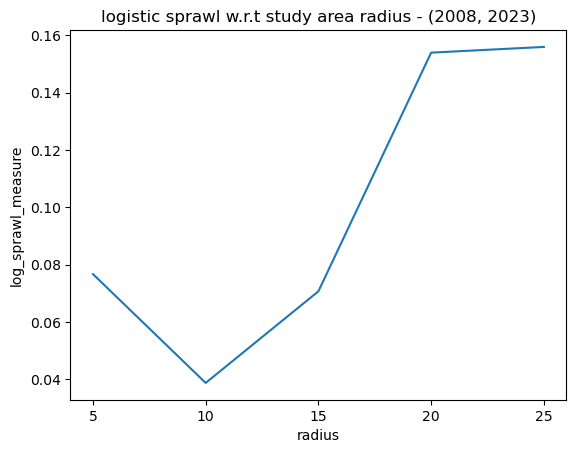

In [251]:
sns.lineplot(x=df.radius, y=df.log_sprawl_measure)
plt.title(f"logistic sprawl w.r.t study area radius - {period}")

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.

In [ ]:
sns.barplot(df,)

In [174]:
list(df["number_ware_per_popM_t0"])

['40.0', '64.0', '65.0', '60.0', '62.0']

In [ ]:
sns.barplot(x=list(df["radius"]), y=list(df["number_ware_per_popM_t0"].map(float)), orient="x")

In [245]:
#sns.barplot(x=list(df["radius"]), y=list(df["number_ware_per_popM_t0"]), orient="x")
#sns.barplot(x=list(df["radius"]), y=list(df["number_ware_per_popM_t0"]), orient="x")

In [221]:
df

,radius,metro,mega_region,country,continent,data_sources,time_period_start,time_period_end,years_data,surfaces_area_available,urban_centrality,gateway,area,number_mun,population_t0,density_pop_km2_t0,number_ware_t0,number_ware_per_popM_t0,number_ware_per_1000km2_t0,avg_size_ware_t0,gravity_t0,population_t1,density_pop_km2_t1,number_ware_t1,number_ware_per_popM_t1,number_ware_per_1000km2_t1,avg_size_ware_t1,gravity_t1,pop_change,gravity_change,number_ware_change,perc_ware_change,number_ware_per_popM_change,log_sprawl_measure,geometry
0,5,lyon,,France,Europe,"BDTOPO_IGN,SIREN",2008,2023,15,True,,,166.0,14,0.82,4929.9,33,40.0,0.0001988668036324916,5294.38,3.47,1.16,6975.17,29,25.0,0.00017473411150777576,3598.66,4.62,0.33999999999999997,1.15,-4,-12.121212121212121,-15.0,0.07666666666666666,None
1,10,lyon,,France,Europe,"BDTOPO_IGN,SIREN",2008,2023,15,True,,,507.6,50,1.23,2437.05,79,64.0,0.00015648117338853756,5298.68,6.03,1.7,3352.14,100,59.0,0.00019700745529619513,4396.42,6.61,0.47,0.5800000000000001,21,26.582278481012654,-5.0,0.03866666666666667,None
2,15,lyon,,France,Europe,"BDTOPO_IGN,SIREN",2008,2023,15,True,,,939.4,94,1.46,1558.64,95,65.0,0.00010112269154440266,5598.12,7.05,2.11,2245.59,144,68.0,0.0001532837547820094,5439.66,8.11,0.6499999999999999,1.0599999999999996,49,51.578947368421055,3.0,0.07066666666666664,None
3,20,lyon,,France,Europe,"BDTOPO_IGN,SIREN",2008,2023,15,True,,,1664.6,148,1.69,1036.56,101,60.0,6.200333132561778e-05,5701.53,7.52,2.48,1491.0,173,70.0,0.00010392868625654931,6490.78,9.83,0.79,2.3100000000000005,72,71.28712871287128,10.0,0.15400000000000003,None
4,25,lyon,,France,Europe,"BDTOPO_IGN,SIREN",2008,2023,15,True,,,2386.7,216,1.91,802.14,118,62.0,4.9440055431413705e-05,6376.98,9.41,2.82,1181.97,233,83.0,9.762407825448895e-05,8925.48,11.75,0.9099999999999999,2.34,115,97.45762711864407,21.0,0.156,None


In [239]:
columns = ["radius"] + ["pop_change", "gravity_change", "number_ware_change", "number_ware_per_popM_change", "log_sprawl_measure"]
df[columns].dtypes

radius                         object
pop_change                     object
gravity_change                 object
number_ware_change             object
number_ware_per_popM_change    object
log_sprawl_measure             object
dtype: object

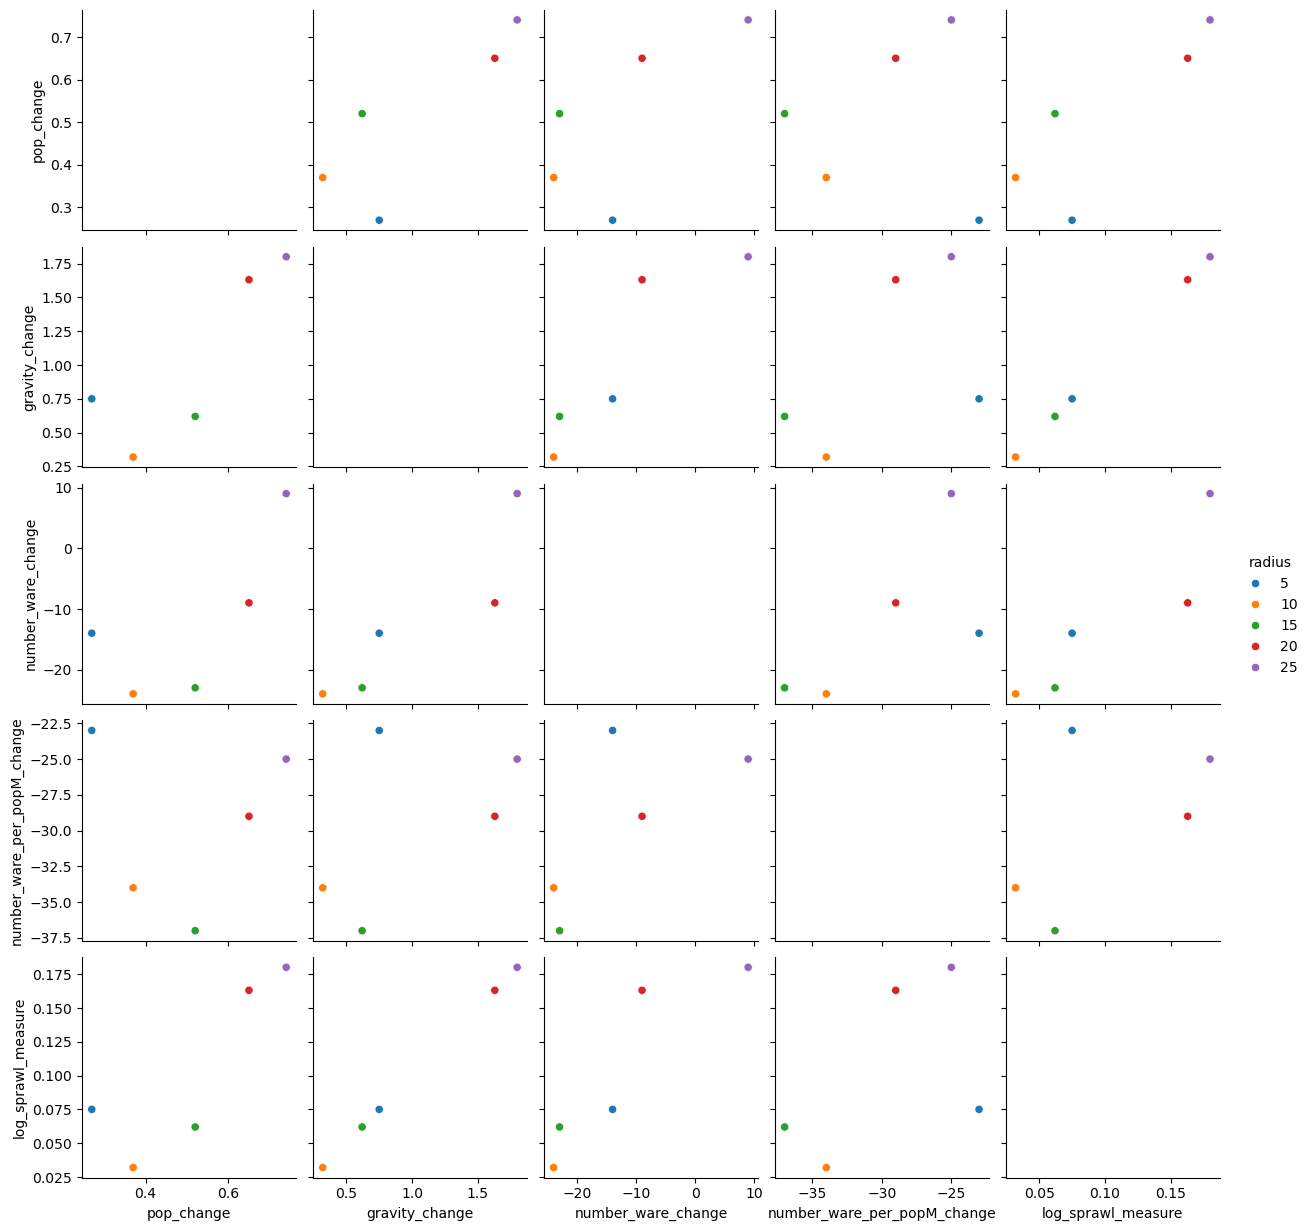

In [246]:
columns = ["radius"] + ["pop_change", "gravity_change", "number_ware_change", "number_ware_per_popM_change", "log_sprawl_measure"]
sns.pairplot(df[columns], hue="radius")

In [ ]:
plt.plot( df["radius"], df["log_sprawl_measure"])

2024-03-11 14:56:35,745 - INFO ::  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-11 14:56:35,748 - INFO ::  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-11 14:56:35,750 - INFO ::  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-11 14:56:35,751 - INFO ::  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


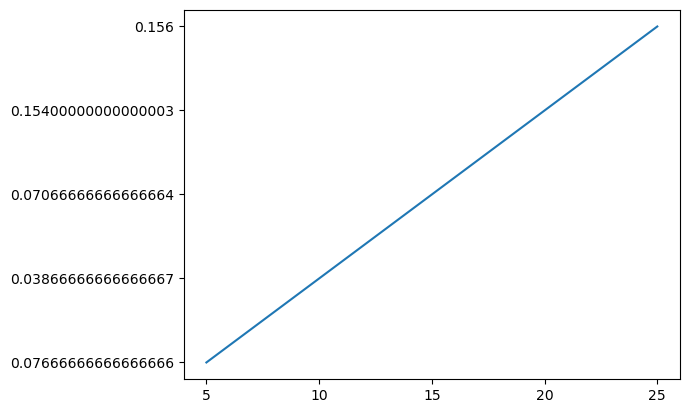

In [220]:
plt.plot( df["radius"], df["log_sprawl_measure"])

2024-03-11 15:24:06,549 - INFO ::  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-11 15:24:06,551 - INFO ::  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-11 15:24:06,553 - INFO ::  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-11 15:24:06,553 - INFO ::  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<BarContainer object of 5 artists>

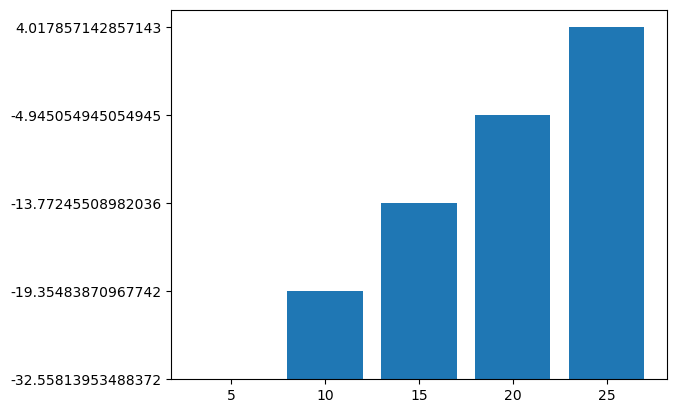

In [233]:
plt.bar(df.radius, df.perc_ware_change)

In [234]:
df.perc_ware_change

0    -32.55813953488372
1    -19.35483870967742
2    -13.77245508982036
3    -4.945054945054945
4     4.017857142857143
Name: perc_ware_change, dtype: object

In [232]:
bdx_center = gpd.GeoDataFrame(geometry=[Point(-0.573349,44.837126)], crs=4326).to_crs(CRS).geometry.item()
print(bdx_center.x, bdx_center.y)

417700.0683908771 6421717.6262871325


In [252]:
ls /home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/data/processed/bordeaux/2008/ZoneEtude

ze_bordeaux_25km.gpkg  ze_bordeaux_5km.gpkg


In [11]:
ze = gpd.read_file("/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/data/processed/bordeaux/2008/ZoneEtude/ze_bordeaux_25km.gpkg")

In [12]:
ze

,geometry


In [4]:
get_communes_from_radius(ENTRY_ROI['bordeaux']["CENTER"], 25_000, 'bordeaux', "2008", columns=None)

,geometry


In [15]:
centroid = ENTRY_ROI["bordeaux"]['CENTER']
buffer = gpd.GeoDataFrame(geometry=[Point(centroid)], crs=CRS).buffer(25_000).to_frame()
#buffer.to_file(make_path(ze_file_name, ze_dir))

# Création de la zone d'étude avec les communes qui intersectes le buffer
# load from download_topo output : warning communes limit max 25k (default value)
communes_path = os.path.join(
    communes_roi_dir.format(name, year),
    communes_roi_file_name.format(name, year)
)
communes = gpd.read_file(communes_path).to_crs(CRS)
columns=None
columns = list(communes.columns) if columns else ["geometry"]    
    
ze = (
    gpd.sjoin(
        communes[columns], 
        buffer, 
        predicate="intersects", 
        how="inner"
        )
    .drop("index_right", axis=1)
    .dissolve()
)

In [19]:
path ="/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/data/processed/bordeaux/2013/Entrepots/Entrepots_bordeaux_2013_5km.gpkg"
df = gpd.read_file(path)

In [20]:
df

,siret,dateFin,dateDebut,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,x,y,epsg,geometry


In [9]:
name="bordeaux"
year="2008"

communes_path = os.path.join(
    communes_roi_dir.format(name, year),
    communes_roi_file_name.format(name, year)
)
communes = gpd.read_file(communes_path).to_crs(CRS)

In [10]:
communes

,ID,PREC_PLANI,NOM,CODE_INSEE,STATUT,CANTON,ARRONDISST,DEPART,REGION,POPUL,MULTICAN,geometry
0,SURFCOMM0000000052189768,30.0,Floirac,33167,Chef-lieu de canton,FLOIRAC,BORDEAUX,GIRONDE,AQUITAINE,16157,Non,"POLYGON ((420451.500 6420002.000, 420587.300 6..."
1,SURFCOMM0000000052189898,30.0,Ludon-Médoc,33256,Commune simple,BLANQUEFORT,BORDEAUX,GIRONDE,AQUITAINE,3327,Non,"POLYGON ((414007.700 6436019.100, 413977.800 6..."
2,SURFCOMM0000000052189714,30.0,Canéjan,33090,Commune simple,GRADIGNAN,BORDEAUX,GIRONDE,AQUITAINE,5114,Non,"POLYGON ((409056.600 6415435.300, 409180.000 6..."
3,SURFCOMM0000000052189830,30.0,Yvrac,33554,Commune simple,CENON,BORDEAUX,GIRONDE,AQUITAINE,2166,Non,"POLYGON ((424164.400 6426459.500, 424225.700 6..."
4,SURFCOMM0000000052189622,30.0,Saint-Michel-de-Rieufret,33452,Commune simple,PODENSAC,BORDEAUX,GIRONDE,AQUITAINE,498,Non,"POLYGON ((423302.700 6397023.700, 423363.500 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
147,SURFCOMM0000000052189670,30.0,Saint-Médard-d'Eyrans,33448,Commune simple,LA BREDE,BORDEAUX,GIRONDE,AQUITAINE,2277,Non,"POLYGON ((419109.800 6406288.800, 419167.500 6..."
148,SURFCOMM0000000052189671,30.0,Martillac,33274,Commune simple,LA BREDE,BORDEAUX,GIRONDE,AQUITAINE,2020,Non,"POLYGON ((415431.700 6405674.700, 415429.900 6..."
149,SURFCOMM0000000052189766,30.0,Mérignac,33281,Chef-lieu de canton,MERIGNAC,BORDEAUX,GIRONDE,AQUITAINE,61992,Oui,"POLYGON ((404109.600 6423829.200, 404146.300 6..."
150,SURFCOMM0000000052189765,30.0,Pessac,33318,Chef-lieu de canton,PESSAC,BORDEAUX,GIRONDE,AQUITAINE,56143,Oui,"POLYGON ((402611.100 6413333.900, 402622.800 6..."


In [7]:
communes_path

'/home/rustt/Documents/IGAST/2_PROJETS/Projet_analyse_spatiale/logistics_sprawl/data/processed/bordeaux/2008/BDTOPO/communes_bordeaux_2008.gpkg'

In [8]:
gpd.read_file(communes_path)

,ID,PREC_PLANI,NOM,CODE_INSEE,STATUT,CANTON,ARRONDISST,DEPART,REGION,POPUL,MULTICAN,geometry


In [ ]:
bdtopo = gpd.read_file(communes_path).to_crs(CRS)